A1: Class Statistics Analysis
Interclass distance: 4.6740
Class M6.99:
  Centroid mean: -0.0105
  Spread mean: 0.9257
Class R25.03:
  Centroid mean: 0.0115
  Spread mean: 1.0232

A2: Feature Histogram Analysis
Feature mean: -0.0000
Feature variance: 1.0000


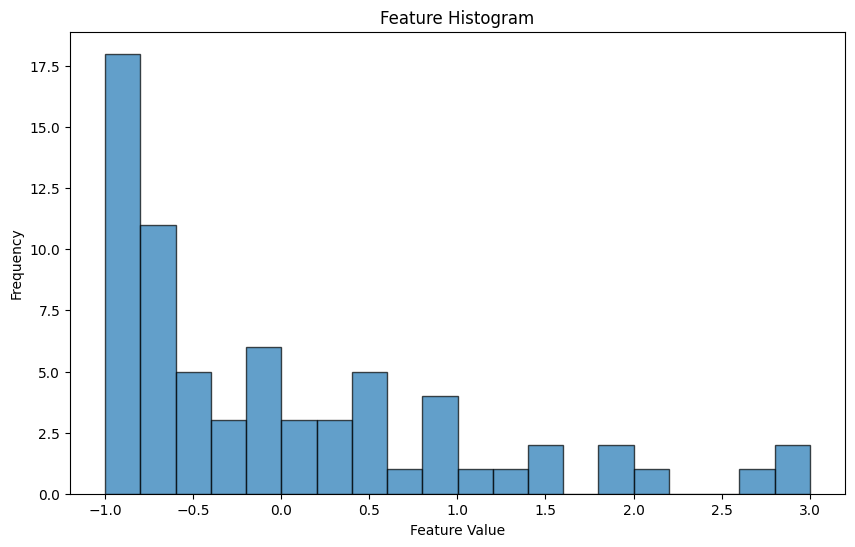


A3: Minkowski Distance Analysis


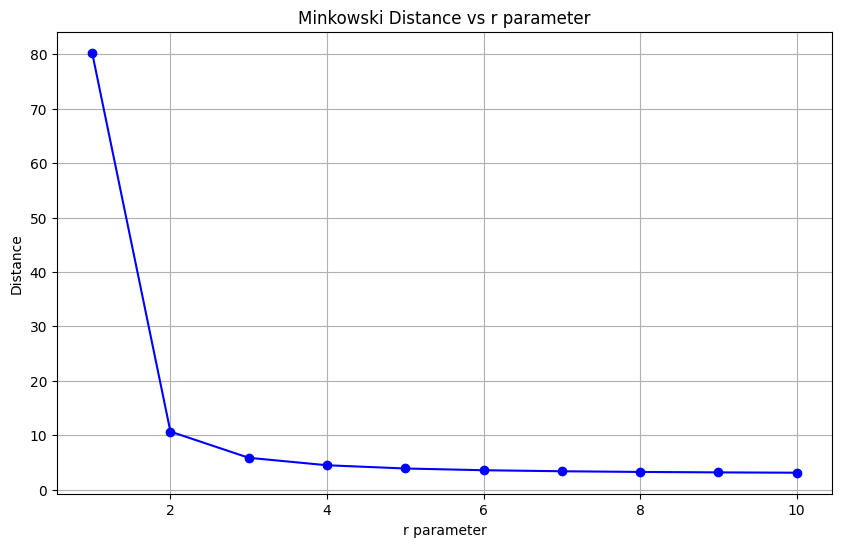


A4: Train-Test Split
Training set size: 48
Test set size: 21

A5: Training kNN Classifier (k=3)
kNN classifier trained successfully

A6: Testing kNN Accuracy
kNN (k=3) accuracy: 0.7619

A7: Predictions
Sample predictions: ['M6.99' 'M6.99' 'R25.03' 'M6.99' 'R25.03' 'M6.99' 'M6.99' 'M6.99'
 'R25.03' 'M6.99']
Single vector prediction: M6.99

A8: Comparing k values


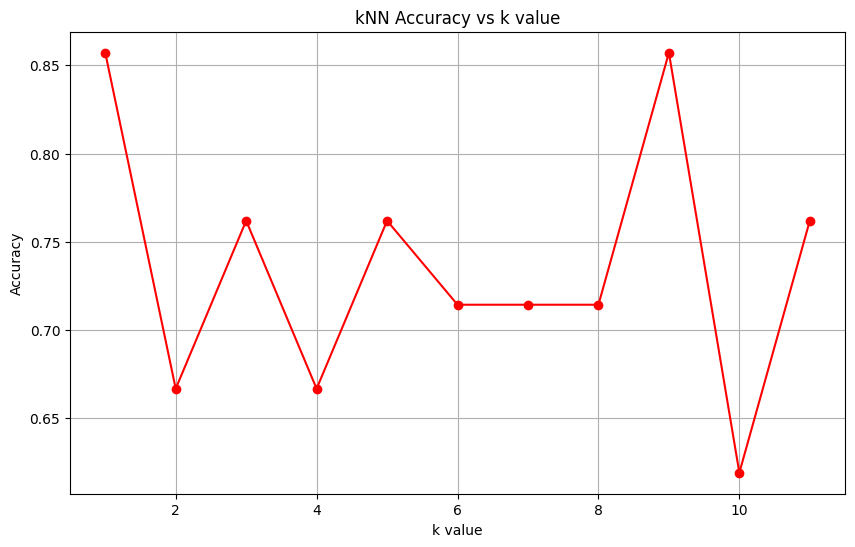

NN (k=1) accuracy: 0.8571
kNN (k=3) accuracy: 0.7619
Best k value: 1 with accuracy: 0.8571

A9: Confusion Matrix and Performance Metrics
Training Set Performance:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-Score: 1.0000
Test Set Performance:
  Accuracy: 0.8571
  Precision: 0.8929
  Recall: 0.8571
  F1-Score: 0.8571


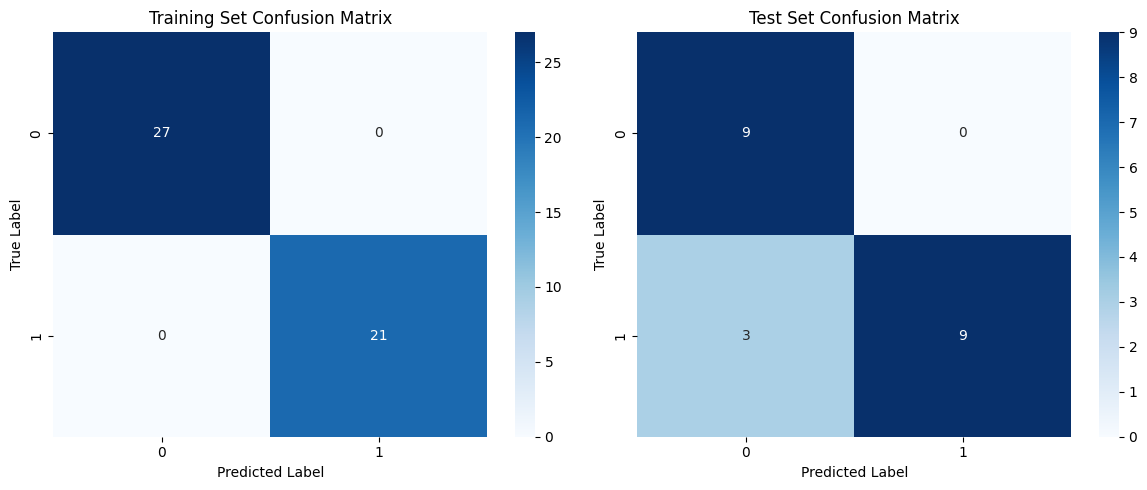


Model Learning Outcome Analysis:
Model shows signs of OVERFITTING (high training accuracy, lower test accuracy)

Performance difference: 0.1429
Potential generalization issues - significant gap between training and test performance


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns

def load_data():
    df = pd.read_csv('20231225_dfall_obs_data_and_spectral_features_revision1_n469.csv')
    return df

def prepare_data(df):
    feature_cols = [col for col in df.columns if col.startswith('V') or col.startswith('F') or col.startswith('M')]
    X = df[feature_cols].dropna()
    y = df.loc[X.index, 'CallerID']
    
    caller_counts = y.value_counts()
    top_two_callers = caller_counts.head(2).index
    
    mask = y.isin(top_two_callers)
    X_filtered = X[mask]
    y_filtered = y[mask]
    
    return X_filtered, y_filtered, feature_cols

def calculate_class_statistics(X, y):
    unique_classes = y.unique()
    centroids = {}
    spreads = {}
    
    for class_label in unique_classes:
        class_data = X[y == class_label]
        centroid = class_data.mean(axis=0)
        spread = class_data.std(axis=0)
        centroids[class_label] = centroid
        spreads[class_label] = spread
    
    classes = list(unique_classes)
    interclass_distance = np.linalg.norm(centroids[classes[0]] - centroids[classes[1]])
    
    return centroids, spreads, interclass_distance

def analyze_feature_histogram(X, feature_cols):
    feature_data = X[feature_cols[0]]
    hist_data, bin_edges = np.histogram(feature_data, bins=20)
    mean_val = np.mean(feature_data)
    variance_val = np.var(feature_data)
    
    return hist_data, bin_edges, mean_val, variance_val

def calculate_minkowski_distances(X):
    vec1 = X.iloc[0].values
    vec2 = X.iloc[1].values
    
    r_values = range(1, 11)
    distances = []
    
    for r in r_values:
        distance = np.sum(np.abs(vec1 - vec2) ** r) ** (1/r)
        distances.append(distance)
    
    return r_values, distances

def train_knn_classifier(X_train, y_train, k=3):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    return classifier

def test_knn_accuracy(classifier, X_test, y_test):
    accuracy = classifier.score(X_test, y_test)
    return accuracy

def predict_with_knn(classifier, X_test):
    predictions = classifier.predict(X_test)
    return predictions

def compare_k_values(X_train, X_test, y_train, y_test):
    k_values = range(1, 12)
    accuracies = []
    
    for k in k_values:
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(X_train, y_train)
        accuracy = classifier.score(X_test, y_test)
        accuracies.append(accuracy)
    
    return k_values, accuracies

def evaluate_confusion_matrix(classifier, X_train, X_test, y_train, y_test):
    train_pred = classifier.predict(X_train)
    test_pred = classifier.predict(X_test)
    
    train_cm = confusion_matrix(y_train, train_pred)
    test_cm = confusion_matrix(y_test, test_pred)
    
    train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(y_train, train_pred, average='weighted')
    test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(y_test, test_pred, average='weighted')
    
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    return (train_cm, test_cm, train_precision, test_precision, 
            train_recall, test_recall, train_f1, test_f1, 
            train_accuracy, test_accuracy)

def main():
    df = load_data()
    X, y, feature_cols = prepare_data(df)
    
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
    
    print("A1: Class Statistics Analysis")
    centroids, spreads, interclass_dist = calculate_class_statistics(X_scaled, y)
    print(f"Interclass distance: {interclass_dist:.4f}")
    
    for class_label in centroids.keys():
        print(f"Class {class_label}:")
        print(f"  Centroid mean: {centroids[class_label].mean():.4f}")
        print(f"  Spread mean: {spreads[class_label].mean():.4f}")
    
    print("\nA2: Feature Histogram Analysis")
    hist_data, bin_edges, mean_val, variance_val = analyze_feature_histogram(X_scaled, feature_cols)
    print(f"Feature mean: {mean_val:.4f}")
    print(f"Feature variance: {variance_val:.4f}")
    
    plt.figure(figsize=(10, 6))
    plt.hist(X_scaled[feature_cols[0]], bins=20, alpha=0.7, edgecolor='black')
    plt.title('Feature Histogram')
    plt.xlabel('Feature Value')
    plt.ylabel('Frequency')
    plt.show()
    
    print("\nA3: Minkowski Distance Analysis")
    r_values, distances = calculate_minkowski_distances(X_scaled)
    
    plt.figure(figsize=(10, 6))
    plt.plot(r_values, distances, 'bo-')
    plt.title('Minkowski Distance vs r parameter')
    plt.xlabel('r parameter')
    plt.ylabel('Distance')
    plt.grid(True)
    plt.show()
    
    print("\nA4: Train-Test Split")
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    print(f"Training set size: {len(X_train)}")
    print(f"Test set size: {len(X_test)}")
    
    print("\nA5: Training kNN Classifier (k=3)")
    knn_3 = train_knn_classifier(X_train, y_train, k=3)
    print("kNN classifier trained successfully")
    
    print("\nA6: Testing kNN Accuracy")
    accuracy_3 = test_knn_accuracy(knn_3, X_test, y_test)
    print(f"kNN (k=3) accuracy: {accuracy_3:.4f}")
    
    print("\nA7: Predictions")
    predictions = predict_with_knn(knn_3, X_test)
    print(f"Sample predictions: {predictions[:10]}")
    
    sample_vector = X_test.iloc[0:1]
    single_pred = knn_3.predict(sample_vector)
    print(f"Single vector prediction: {single_pred[0]}")
    
    print("\nA8: Comparing k values")
    k_values, accuracies = compare_k_values(X_train, X_test, y_train, y_test)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracies, 'ro-')
    plt.title('kNN Accuracy vs k value')
    plt.xlabel('k value')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()
    
    knn_1 = train_knn_classifier(X_train, y_train, k=1)
    accuracy_1 = test_knn_accuracy(knn_1, X_test, y_test)
    print(f"NN (k=1) accuracy: {accuracy_1:.4f}")
    print(f"kNN (k=3) accuracy: {accuracy_3:.4f}")
    
    best_k = k_values[np.argmax(accuracies)]
    best_accuracy = max(accuracies)
    print(f"Best k value: {best_k} with accuracy: {best_accuracy:.4f}")
    
    print("\nA9: Confusion Matrix and Performance Metrics")
    knn_best = train_knn_classifier(X_train, y_train, k=best_k)
    
    (train_cm, test_cm, train_precision, test_precision, 
     train_recall, test_recall, train_f1, test_f1, 
     train_accuracy, test_accuracy) = evaluate_confusion_matrix(knn_best, X_train, X_test, y_train, y_test)
    
    print("Training Set Performance:")
    print(f"  Accuracy: {train_accuracy:.4f}")
    print(f"  Precision: {train_precision:.4f}")
    print(f"  Recall: {train_recall:.4f}")
    print(f"  F1-Score: {train_f1:.4f}")
    
    print("Test Set Performance:")
    print(f"  Accuracy: {test_accuracy:.4f}")
    print(f"  Precision: {test_precision:.4f}")
    print(f"  Recall: {test_recall:.4f}")
    print(f"  F1-Score: {test_f1:.4f}")
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Training Set Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    plt.subplot(1, 2, 2)
    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Test Set Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    plt.tight_layout()
    plt.show()
    
    print("\nModel Learning Outcome Analysis:")
    if train_accuracy > test_accuracy + 0.1:
        print("Model shows signs of OVERFITTING (high training accuracy, lower test accuracy)")
    elif train_accuracy < 0.6 and test_accuracy < 0.6:
        print("Model shows signs of UNDERFITTING (low performance on both sets)")
    else:
        print("Model shows REGULAR FIT (balanced performance)")
    
    print(f"\nPerformance difference: {train_accuracy - test_accuracy:.4f}")
    
    if abs(train_accuracy - test_accuracy) < 0.05:
        print("Good generalization - small gap between training and test performance")
    else:
        print("Potential generalization issues - significant gap between training and test performance")

if __name__ == "__main__":
    main()